<a href="https://colab.research.google.com/github/sftSalman/tensoflowMaster/blob/main/Simple_custom_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [18]:
class Model(object):
  def __init__(self):
    self.w = tf.Variable(2.0)
    self.b = tf.Variable(3.0)

  def __call__(self,x):
    return self.w * x + self.b

In [19]:
model = Model()

In [20]:
def loss(pred_y,tar_y):
  return tf.reduce_sum(tf.square(pred_y,tar_y))

In [21]:
TRUE_w = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

xs  = tf.random.normal(shape=[NUM_EXAMPLES])

ys = (TRUE_w * xs) + TRUE_b

In [25]:
def plot_data(inputs,outputs, pred_outputs):
  real = plt.scatter(inputs,outputs,c='b',marker='.')
  predicted = plt.scatter(inputs,pred_outputs,c='r', marker = '.')
  plt.legend((real,predicted), ('Real Data', 'Predicted Data'))
  plt.show()


# def plot_data(inputs, outputs, predicted_outputs):
#   real = plt.scatter(inputs, outputs, c='b', marker='.')
#   predicted = plt.scatter(inputs, predicted_outputs, c='r', marker='+')
#   plt.legend((real,predicted), ('Real Data', 'Predicted Data'))
#   plt.show()

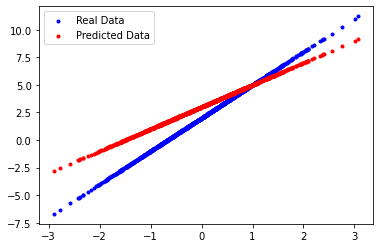

Current loss: 12773.306641


In [26]:
plot_data(xs, ys, model(xs))
print('Current loss: %1.6f' % loss(model(xs), ys).numpy())

In [30]:
def train(model,inputs,outputs, learning_rate):
  with tf.GradientTape() as t :
    current_loss = loss(model(inputs),outputs)
    dw,db = t.gradient(current_loss,[model.w, model.b])
    model.w.assign_sub(learning_rate * dw)
    model.b.assign_sub(learning_rate * db)
    return current_loss

In [32]:
model = Model()

# Collect the history of W-values and b-values to plot later
list_w, list_b = [], []
epochs = range(15)
losses = []
for epoch in epochs:
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss = train(model, xs, ys, learning_rate=0.1)
  losses.append(current_loss)
  print('Epoch %2d: w=%1.2f b=%1.2f, loss=%2.5f' % 
        (epoch, list_w[-1], list_b[-1], current_loss))

Epoch  0: w=2.00 b=3.00, loss=12773.30664
Epoch  1: w=-367.19 b=-602.43, loss=490620608.00000
Epoch  2: w=67553.94 b=120879.72, loss=18952652587008.00000
Epoch  3: w=-12455577.00 b=-24238404.00, loss=735727141890555904.00000
Epoch  4: w=2301849856.00 b=4857246720.00, loss=28678814340704261636096.00000
Epoch  5: w=-426418372608.00 b=-972839190528.00, loss=1121799928893115296630439936.00000
Epoch  6: w=79192335056896.00 b=194752288915456.00, loss=44007723884687121733056920027136.00000
Epoch  7: w=-14745430181019648.00 b=-38970639163326464.00, loss=1730560154476822217328006185762160640.00000
Epoch  8: w=2752915157305786368.00 b=7795176801117929472.00, loss=inf
Epoch  9: w=-515368578933212577792.00 b=-1558711593631624462336.00, loss=inf
Epoch 10: w=96751028953183969869824.00 b=311582296824365164003328.00, loss=inf
Epoch 11: w=-18214701327084854559375360.00 b=-62267455012780471073374208.00, loss=inf
Epoch 12: w=3438957433051859739209629696.00 b=12440657750277967069292003328.00, loss=inf
Epo

In [33]:
model = Model()

# Collect the history of W-values and b-values to plot later
list_w, list_b = [], []
epochs = range(15)
losses = []
for epoch in epochs:
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss = train(model, xs, ys, learning_rate=0.1)
  losses.append(current_loss)
  print('Epoch %2d: w=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, list_w[-1], list_b[-1], current_loss))

Epoch  0: w=2.00 b=3.00, loss=12773.30664
Epoch  1: w=-367.19 b=-602.43, loss=490620608.00000
Epoch  2: w=67553.94 b=120879.72, loss=18952652587008.00000
Epoch  3: w=-12455577.00 b=-24238404.00, loss=735727141890555904.00000
Epoch  4: w=2301849856.00 b=4857246720.00, loss=28678814340704261636096.00000
Epoch  5: w=-426418372608.00 b=-972839190528.00, loss=1121799928893115296630439936.00000
Epoch  6: w=79192335056896.00 b=194752288915456.00, loss=44007723884687121733056920027136.00000
Epoch  7: w=-14745430181019648.00 b=-38970639163326464.00, loss=1730560154476822217328006185762160640.00000
Epoch  8: w=2752915157305786368.00 b=7795176801117929472.00, loss=inf
Epoch  9: w=-515368578933212577792.00 b=-1558711593631624462336.00, loss=inf
Epoch 10: w=96751028953183969869824.00 b=311582296824365164003328.00, loss=inf
Epoch 11: w=-18214701327084854559375360.00 b=-62267455012780471073374208.00, loss=inf
Epoch 12: w=3438957433051859739209629696.00 b=12440657750277967069292003328.00, loss=inf
Epo

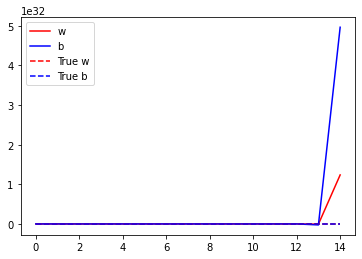

In [34]:
plt.plot(epochs, list_w, 'r',
       epochs, list_b, 'b')
plt.plot([TRUE_w] * len(epochs), 'r--',
      [TRUE_b] * len(epochs), 'b--')
plt.legend(['w', 'b', 'True w', 'True b'])
plt.show()